Repair

# Cleaning

In [37]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from sklearn.utils import shuffle

In [38]:
# Sklearn imports
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


# DiCE imports
import dice_ml
from dice_ml.utils import helpers  # helper functions

import pickle
from sklearn.metrics import accuracy_score,  recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc

In [39]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt

In [40]:
# Read all the CSV files
df1 = pd.read_csv('Generated_CFs/cf_df_3166_1_1.csv')
df2 = pd.read_csv('Generated_CFs/cf_df_3166_2_1.csv')
df3 = pd.read_csv('Generated_CFs/cf_df_6330_1_3.csv')
df4 = pd.read_csv('Generated_CFs/cf_df_6330_2_3.csv')

df5 = pd.read_csv('Generated_CFs/cf_df_3166_1_2.csv')
df6 = pd.read_csv('Generated_CFs/cf_df_3166_2_2.csv')
df7 = pd.read_csv('Generated_CFs/cf_df_6330_1_4.csv')
df8 = pd.read_csv('Generated_CFs/cf_df_6330_2_4.csv')

df9 = pd.read_csv('Generated_CFs/cf_df_3166_1_5.csv')
df10 = pd.read_csv('Generated_CFs/cf_df_3166_2_5.csv')
df11 = pd.read_csv('Generated_CFs/cf_df_6330_1_5.csv')
df12 = pd.read_csv('Generated_CFs/cf_df_6330_2_5.csv')

# Combine them into a single DataFrame
df_cf = pd.concat([df1,  df3, df5, df7, df2, df4,df6,df8,df9,df10,df11,df12])
df_cf = df_cf.sample(n=45222, random_state=42)

In [41]:
# Load the dataframe from a csv file
df = pd.read_csv('CensusAdultIncome.csv')

In [42]:
start_index = 1 + len(df)  # Calculate the starting index
new_index = range(start_index, start_index + len(df_cf))  # Create a new index starting from start_index
df_cf_reset = df_cf.copy()  # Create a copy of the DataFrame
df_cf_reset.index = new_index  # Set the new index
df_cf = df_cf_reset # Assign the new indexed DataFrame to the original DataFrame
df_cf.drop(columns=['Unnamed: 0'], inplace=True)  # Drop the 'Unnamed: 0' column

In [43]:
#Target value has values with dots, therefore 4 catagories
df['income'] = df['income'].str.replace('.', '')

# Replace the values in the target column with string '0' and '1'.
df['income'] = df['income'].str.replace('<=50K', '0')  
df['income'] = df['income'].str.replace('>50K', '1')   

# Convert to integer
df['income'] = df['income'].astype(int)

In [44]:
#Some values are like '?'. Replacing them as NaN 
df[df == '?'] = np.nan
# Dropping the rows with NaN values in  'workclass', 'occupation', 'native-country' for the test dataset
df.dropna(subset=['workclass', 'occupation', 'native-country'], inplace=True)
df.dropna( inplace=True)
df.drop(columns=['education', 'occupation', 'native-country'], inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   relationship    45222 non-null  object
 6   race            45222 non-null  object
 7   sex             45222 non-null  object
 8   capital-gain    45222 non-null  int64 
 9   capital-loss    45222 non-null  int64 
 10  hours-per-week  45222 non-null  int64 
 11  income          45222 non-null  int32 
dtypes: int32(1), int64(6), object(5)
memory usage: 4.3+ MB


In [46]:
df_cf.head()

,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
48843,44,Local-gov,48549,10,Married-civ-spouse,Husband,Black,Male,0,0,99,1
48844,50,Private,171924,13,Separated,Husband,Other,Male,0,0,43,0
48845,18,Without-pay,302859,9,Never-married,Own-child,White,Male,15340,0,20,1
48846,25,Private,196947,13,Never-married,Own-child,White,Female,78438,0,40,1
48847,37,Private,406328,13,Married-civ-spouse,Husband,Black,Male,0,0,21,0


In [47]:
# Creating X and y sets.income is the target variable and native country dropped because it has 41 unique values and occupation is very similar too workclass.
X_original = df.drop(['income'], axis=1)
y = df['income']

X_counterfactual = df_cf.drop(['income'], axis=1)
cf_y = df_cf['income']

In [48]:
X_counterfactual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 48843 to 94064
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   relationship    45222 non-null  object
 6   race            45222 non-null  object
 7   sex             45222 non-null  object
 8   capital-gain    45222 non-null  int64 
 9   capital-loss    45222 non-null  int64 
 10  hours-per-week  45222 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 3.8+ MB


In [49]:
# Defining the columns' categories
numerical = ['age' ,'fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
categorical = ['workclass','marital-status',  'relationship', 'race', 'sex']
continuous_features = ['capital-gain', 'capital-loss']
outcome_name = 'income'

# Decision Boundry

In [50]:
# Preprocessing for cataegorical data - OneHotEncoding
categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])
        # Preprocessing for numerical data - StandardScaler
numerical_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
    
    # Bundle preprocessing for data
transformations = ColumnTransformer(
        transformers=[            
            #('num', numerical_transformer, numerical),  
            ('cat', categorical_transformer, categorical)],
        remainder='passthrough')
    
    # Define the Random Forest model
clf_RF = Pipeline(steps=[('preprocessor', transformations), 
                             ('classifier', RandomForestClassifier(n_estimators=100, max_depth=None))])
    
    

In [55]:
# Fit the model on original data
clf_RF.fit(X_original, y)
# Transform the original and counterfactual data
X_original_transformed = clf_RF.named_steps['preprocessor'].transform(X_original)
X_counterfactual_transformed = clf_RF.named_steps['preprocessor'].transform(X_counterfactual)

# Get predicted probabilities for original and counterfactual data
probabilities_original = clf_RF.predict_proba(X_original)[:, 1]
probabilities_counterfactual = clf_RF.predict_proba(X_counterfactual)[:, 1]

# Function to compute distance from probability
def distance_from_probabilities(X, probabilities, threshold=0.5, margin=0.05):
    boundary_indices = np.where((probabilities > threshold - margin) & (probabilities < threshold + margin))[0]
    boundary_points = X[boundary_indices]
    
    # Initialize distances list
    distances = np.zeros(len(X))
    
    # Compute distances for each point
    for i, point in enumerate(X):
        dist = np.linalg.norm(boundary_points - point, axis=1)
        distances[i] = np.min(dist) if len(dist) > 0 else np.nan
    
    return distances

# Compute distances for original and counterfactual data
distances_original = distance_from_probabilities(X_original_transformed, probabilities_original)
distances_counterfactual = distance_from_probabilities(X_counterfactual_transformed, probabilities_counterfactual)

# Combine distances into a DataFrame
min_length = min(len(distances_original), len(distances_counterfactual))
distances_df = pd.DataFrame({
    'Original': distances_original[:min_length], 
    'Counterfactual': distances_counterfactual[:min_length]
})
# Set display precision to 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format)
print(distances_df.describe())

        Original  Counterfactual
count   45222.00        45222.00
mean    13232.48         2381.27
std     32707.18         6016.34
min         0.00            0.00
25%      1661.14           64.54
50%      4142.69          885.15
75%     10932.05         3509.11
max   1101146.00       312522.00


In [52]:
# Fit the pipeline
clf_RF.fit(X_original, y)

# Extract the trained logistic regression model
log_reg = clf_RF.named_steps['classifier']

# Apply the same preprocessing transformations to the original data
X_transformed_original = clf_RF.named_steps['preprocessor'].transform(X_original)
X_transformed_counterfactual = clf_RF.named_steps['preprocessor'].transform(X_counterfactual)

In [53]:
# Function to compute Euclidean distance to decision boundary for logistic regression
def distance_to_boundary_logistic(X, model):
    decision_boundary = -(model.coef_[0][0] * X[:, 0] + model.intercept_) / model.coef_[0][1]
    distance = np.abs(X[:, 1] - decision_boundary) / np.sqrt(model.coef_[0][0]**2 + model.coef_[0][1]**2)
    return distance

In [54]:
# Compute distances for counterfactual data
distances_log_reg_counterfactual = distance_to_boundary_logistic(X_transformed_counterfactual, log_reg)
distances_log_reg_original = distance_to_boundary_logistic(X_transformed_original, log_reg)

min_length = min(len(distances_log_reg_original), len(distances_log_reg_counterfactual))

# Compare distances
distances_df = pd.DataFrame({
    'Original': distances_log_reg_original[:min_length], 
    'Counterfactual': distances_log_reg_counterfactual[:min_length]
})

print(distances_df.describe())


AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'

In [ ]:
# Compute distances for original data
distances_log_reg_original = distance_to_boundary_logistic(X_transformed_original, log_reg)

# For decision tree and random forest, we use predicted probabilities
#probabilities_tree_original = tree.predict_proba(X_original)[:, 1]
probabilities_forest_original = clf_RF.predict_proba(X_original)[:, 1]

# Function to compute distance from probability
def distance_from_probabilities(X, probabilities):
    boundary_indices = np.where((probabilities > 0.45) & (probabilities < 0.55))[0]
    return np.linalg.norm(X[boundary_indices] - X, axis=1)

#distances_tree_original = distance_from_probabilities(X_original, probabilities_tree_original)
distances_forest_original = distance_from_probabilities(X_original, probabilities_forest_original)

# Compare distances for original data
distances_df_original = pd.DataFrame({
    'Logistic Regression': distances_log_reg_original, 
   # 'Decision Tree': distances_tree_original, 
    'Random Forest': distances_forest_original
})

print(distances_df_original.describe())

# Compute distances for counterfactual data
distances_log_reg_counterfactual = distance_to_boundary_logistic(X_counterfactual, clf_LR)
#probabilities_tree_counterfactual = tree.predict_proba(X_counterfactual)[:, 1]
probabilities_forest_counterfactual = clf_RF.predict_proba(X_counterfactual)[:, 1]

#distances_tree_counterfactual = distance_from_probabilities(X_counterfactual, probabilities_tree_counterfactual)
distances_forest_counterfactual = distance_from_probabilities(X_counterfactual, probabilities_forest_counterfactual)

# Compare distances for counterfactual data
distances_df_counterfactual = pd.DataFrame({
    'Logistic Regression': distances_log_reg_counterfactual, 
    #'Decision Tree': distances_tree_counterfactual, 
    'Random Forest': distances_forest_counterfactual
})

print(distances_df_counterfactual.describe())

NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Plots for creating feature importance plot

In [ ]:
auc_df = pd.read_excel('Performance_metrics/model_perf_metrics_mean_of_iterations_Results .xlsx')
auc_onlycf_df = pd.read_excel('Performance_metrics\model_perf_metrics_mean_of_iterations_only_with_cfs_Results .xlsx')

In [ ]:
auc_onlycf_df.tail()

,Unnamed: 0,Model,Iteration,Sample Size,CF Num,X_fit Size,F1 (%),F1 (%)_std,AUC (%),AUC (%)_std
10,10,RF_simp_2_sample:6330_cf:2_mean_of_3_iteration...,3,6330,2,8714,0.000000,0.000000,0.500000,0.000000
11,12,RF_simp_2_sample:9495_cf:1_mean_of_3_iteration...,3,9495,1,6418,0.000384,0.000543,0.500080,0.000113
12,14,RF_simp_2_sample:9495_cf:2_mean_of_3_iteration...,3,9495,2,12947,0.005908,0.008355,0.501490,0.002108
13,1,RF_simp_def_1_mean_of_iterations,3,0,0,31655,0.621022,0.002959,0.731213,0.001792
14,2,RF_simp_def_2_mean_of_iterations,3,0,0,31655,0.381094,0.044323,0.617564,0.016520


In [ ]:
# Get the AUC score for the LR default model
lr_default_auc_1 =  auc_df[auc_df['Model'].str.startswith('RF_default')]['AUC (%)'].iloc[0]
auc_scores = auc_df[auc_df['Model'].str.startswith('RF_simp_1_sample:')]['AUC (%)'].tolist()
auc_diff_1 = auc_scores - lr_default_auc_1
# Get the AUC score for the LR default model
lr_default_auc_2 =  auc_df[auc_df['Model'].str.startswith('RF_default')]['AUC (%)'].iloc[0]
auc_scores = auc_df[auc_df['Model'].str.startswith('RF_simp_2_sample:')]['AUC (%)'].tolist()
auc_diff_2 = auc_scores - lr_default_auc_2

lr_default_auc_cf_1 =  auc_onlycf_df[auc_onlycf_df['Model'].str.startswith('RF_default')]['AUC (%)'].iloc[0]
auc_scores_cf = auc_onlycf_df[auc_onlycf_df['Model'].str.startswith('RF_simp_1_sample:')]['AUC (%)'].tolist()
auc_diff_cf_1 = auc_scores_cf - lr_default_auc_cf_1
# hello
lr_default_auc_cf_2 =  auc_onlycf_df[auc_onlycf_df['Model'].str.startswith('RF_default')]['AUC (%)'].iloc[0]
auc_scores_cf = auc_onlycf_df[auc_onlycf_df['Model'].str.startswith('RF_simp_2_sample:')]['AUC (%)'].tolist()
auc_diff_cf_2 = auc_scores_cf - lr_default_auc_cf_2

print(auc_diff_cf_1)
print(auc_diff_cf_2)
print(auc_scores)


[-0.25678284 -0.24272732 -0.20132657 -0.21143851 -0.19588309 -0.23932071]
[-0.27277484 -0.27139661 -0.26955261 -0.2718716  -0.27179195 -0.27038136]
[0.6186231759893612, 0.6055102089384018, 0.5829140000818657, 0.5773533723432914, 0.5811396229037383, 0.559763208221601, 0.5601980340808814, 0.5252530268890748]


In [ ]:
from scipy.stats import ks_2samp
import pandas as pd

def ks_test_all_features(original_df, cf_df):
    results = {}
    # Iterate over columns in the original dataframe
    for column in original_df.columns:
        # Check if the column exists in the counterfactual dataframe and both columns are not empty
            # Apply the KS test
        stat, p_value = ks_2samp(original_df[column].dropna(), cf_df[column].dropna())
        results[column] = {'KS Statistic': stat}

    return results

# Example usage assuming original_df and cf_df have been preprocessed
ks_results = ks_test_all_features(df, df_cf)
ks_results_df = pd.DataFrame(ks_results).T
print(ks_results_df)


# Calculate the mean of the KS statistics
mean_ks_statistic = ks_results_df['KS Statistic'].mean()
print("Mean KS Statistic:", mean_ks_statistic)


                KS Statistic
age                 0.248971
workclass           0.049825
fnlwgt              0.035316
education-num       0.543971
marital-status      0.311924
relationship        0.360836
race                0.055684
sex                 0.197234
capital-gain        0.051632
capital-loss        0.015292
hours-per-week      0.184211
income              0.112070
Mean KS Statistic: 0.18058040935672515


In [ ]:
list_1 = [3166, 6330, 9495, 10000]
list_2 = [1, 2]

list_3 = [1,2,3] #iterations

In [ ]:
ks_results_list = [] 
for i in list_1:
    for t in list_2:
        for z in list_3:
            df_cf = pd.read_csv('Generated_CFs/cf_df_{}_{}_{}.csv'.format(i,t, z), index_col=0)
            start_index = 1 + len(df)  # Calculate the starting index
            new_index = range(start_index, start_index + len(df_cf))  # Create a new index starting from start_index
            df_cf_reset = df_cf.copy()  # Create a copy of the DataFrame
            df_cf_reset.index = new_index  # Set the new index
            df_cf = df_cf_reset # Assign the new indexed DataFrame to the original DataFrame
            ks_results = ks_test_all_features(df, df_cf)
            ks_results_df = pd.DataFrame(ks_results).T
            mean_ks_statistic = ks_results_df['KS Statistic'].mean()
            ks_results_list.append(mean_ks_statistic)

In [ ]:
ks_results_list

[0.17869083023543994,
 0.1795040272614622,
 0.17989126394052046,
 0.17962524366471735,
 0.17995662768031193,
 0.18058040935672515,
 0.1800171513795675,
 0.17811711299305713,
 0.17995099139543583,
 0.17870951393688092,
 0.18176438407847575,
 0.176372733532247,
 0.1767652068126521,
 0.17964579606440076,
 0.17507956788199852,
 0.17802630503626515,
 0.17650113877326631,
 0.17624167760871243,
 0.17748712476881492,
 0.17730929008393795,
 0.17767681509935032,
 0.17893189964157705,
 0.17952329749103937,
 0.1795830346475508]

getting the average of every iteration

In [ ]:
# Create a new list that gets the means of every 5 number
new_list = [(ks_results_list[i] + ks_results_list[i + 1]+ ks_results_list[i + 2]  ) / 3 for i in range(0, len(ks_results_list) - 1, 3)]


# Print the new list
print(new_list)
ks_results_list = new_list.copy()

[0.17936204047914087, 0.18005409356725147, 0.1793617519226868, 0.17894887718253458, 0.17716352358635046, 0.17692304047274798, 0.17749107665070107, 0.17934607726005572]


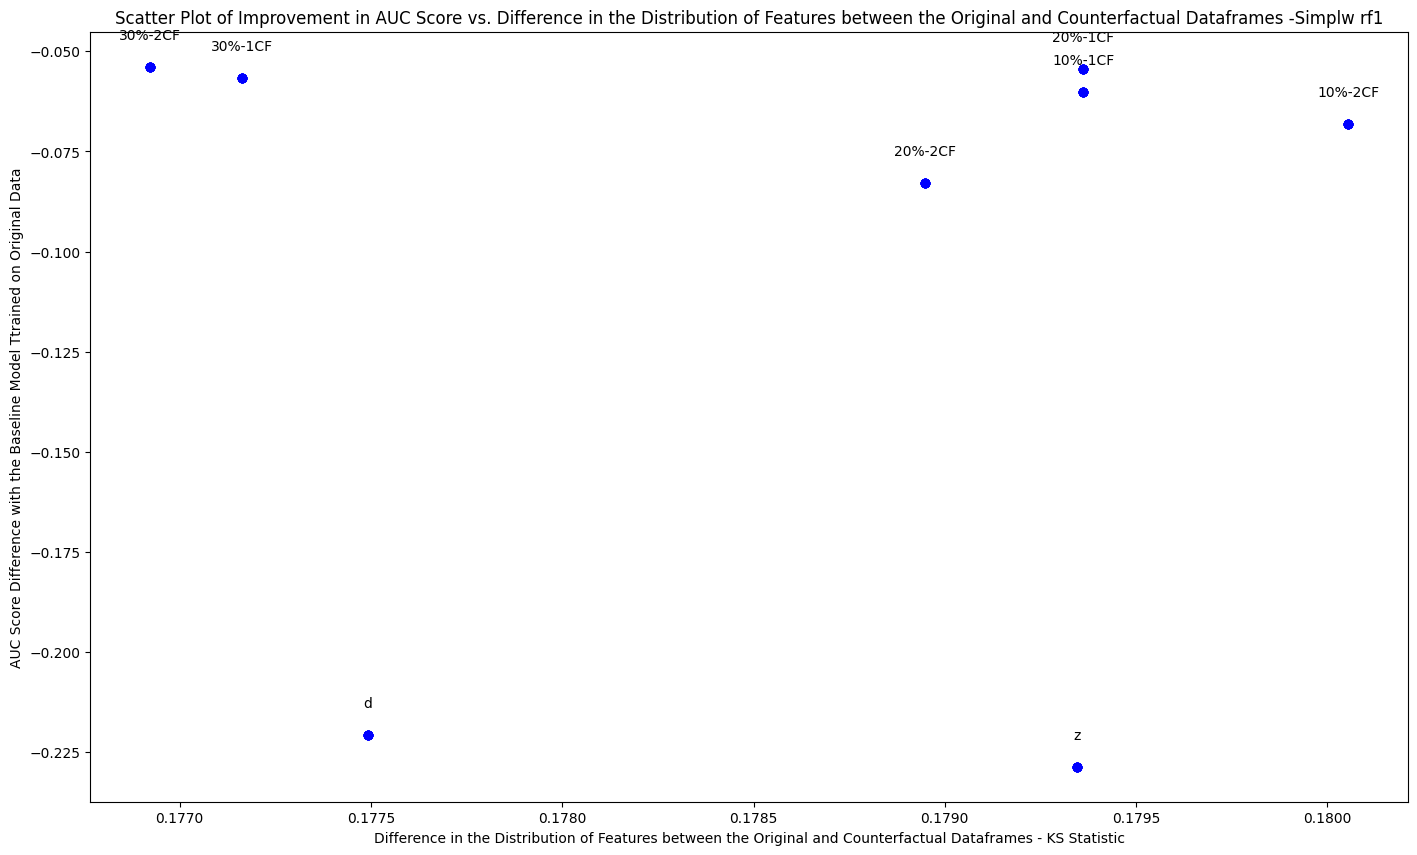

In [ ]:

labels = ['10%-1CF', '10%-2CF', '20%-1CF', '20%-2CF', '30%-1CF', '30%-2CF','d', 'z']

# Show the plot
plt.figure(figsize=(17, 10))
# Plotting
for i, label in enumerate(labels):

    plt.scatter(ks_results_list, auc_diff_1, color='blue')  # You can customize the color and marker.
    plt.annotate(label, (ks_results_list[i], auc_diff_1[i]),
                 textcoords="offset points", xytext=(0,20), ha='center')
plt.title('Scatter Plot of Improvement in AUC Score vs. Difference in the Distribution of Features between the Original and Counterfactual Dataframes -Simplw rf1')
plt.xlabel('Difference in the Distribution of Features between the Original and Counterfactual Dataframes - KS Statistic')
plt.ylabel('AUC Score Difference with the Baseline Model Ttrained on Original Data')
plt.show()

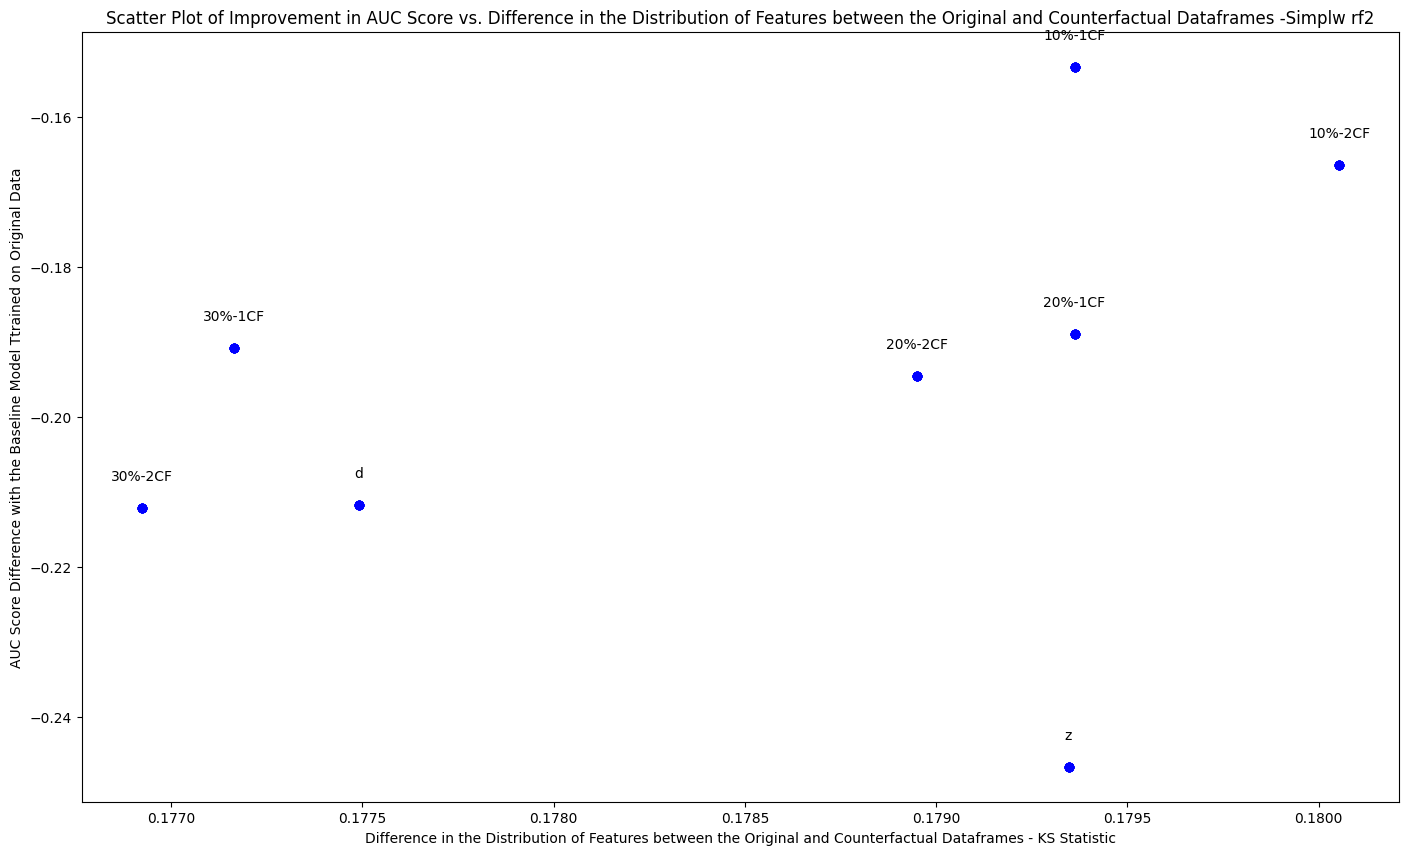

In [ ]:


# Show the plot
plt.figure(figsize=(17, 10))
# Plotting
for i, label in enumerate(labels):

    plt.scatter(ks_results_list, auc_diff_2, color='blue')  # You can customize the color and marker.
    plt.annotate(label, (ks_results_list[i], auc_diff_2[i]),
                 textcoords="offset points", xytext=(0,20), ha='center')
plt.title('Scatter Plot of Improvement in AUC Score vs. Difference in the Distribution of Features between the Original and Counterfactual Dataframes -Simplw rf2')
plt.xlabel('Difference in the Distribution of Features between the Original and Counterfactual Dataframes - KS Statistic')
plt.ylabel('AUC Score Difference with the Baseline Model Ttrained on Original Data')
plt.show()

ValueError: x and y must be the same size

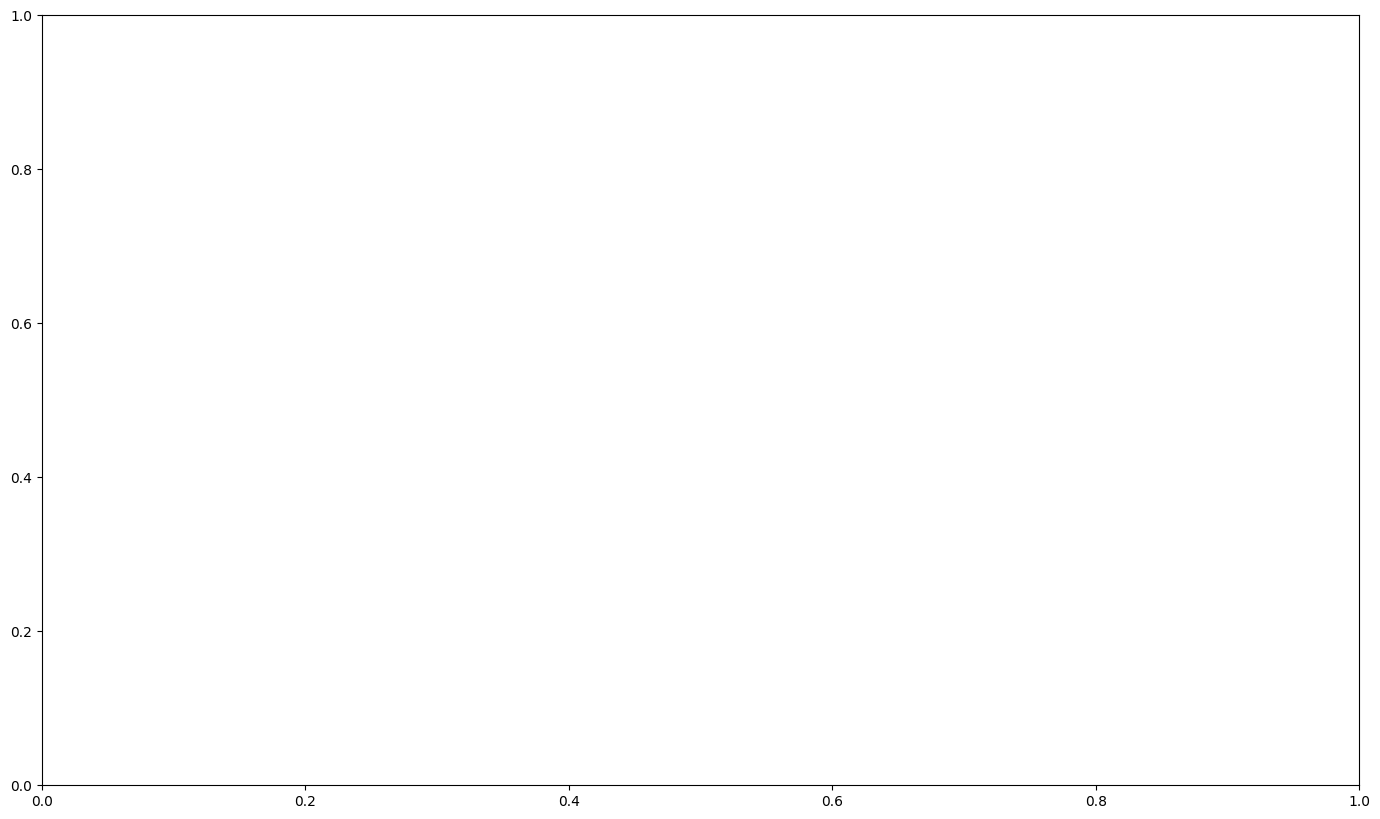

In [ ]:


# Show the plot
plt.figure(figsize=(17, 10))
# Plotting
for i, label in enumerate(labels):

    plt.scatter(ks_results_list, auc_diff_cf_1, color='blue')  # You can customize the color and marker.
    plt.annotate(label, (ks_results_list[i], auc_diff_cf_1[i]),
                 textcoords="offset points", xytext=(0,20), ha='center')
plt.title('Scatter Plot of Improvement in AUC Score vs. Difference in the Distribution of Features between the Original and Counterfactual Dataframes - KS Statistic')
plt.xlabel('Difference in the Distribution of Features between the Original and Counterfactual Dataframes - KS Statistic')
plt.ylabel('AUC Score Difference with the Baseline Model Ttrained on Original Data')
plt.show()

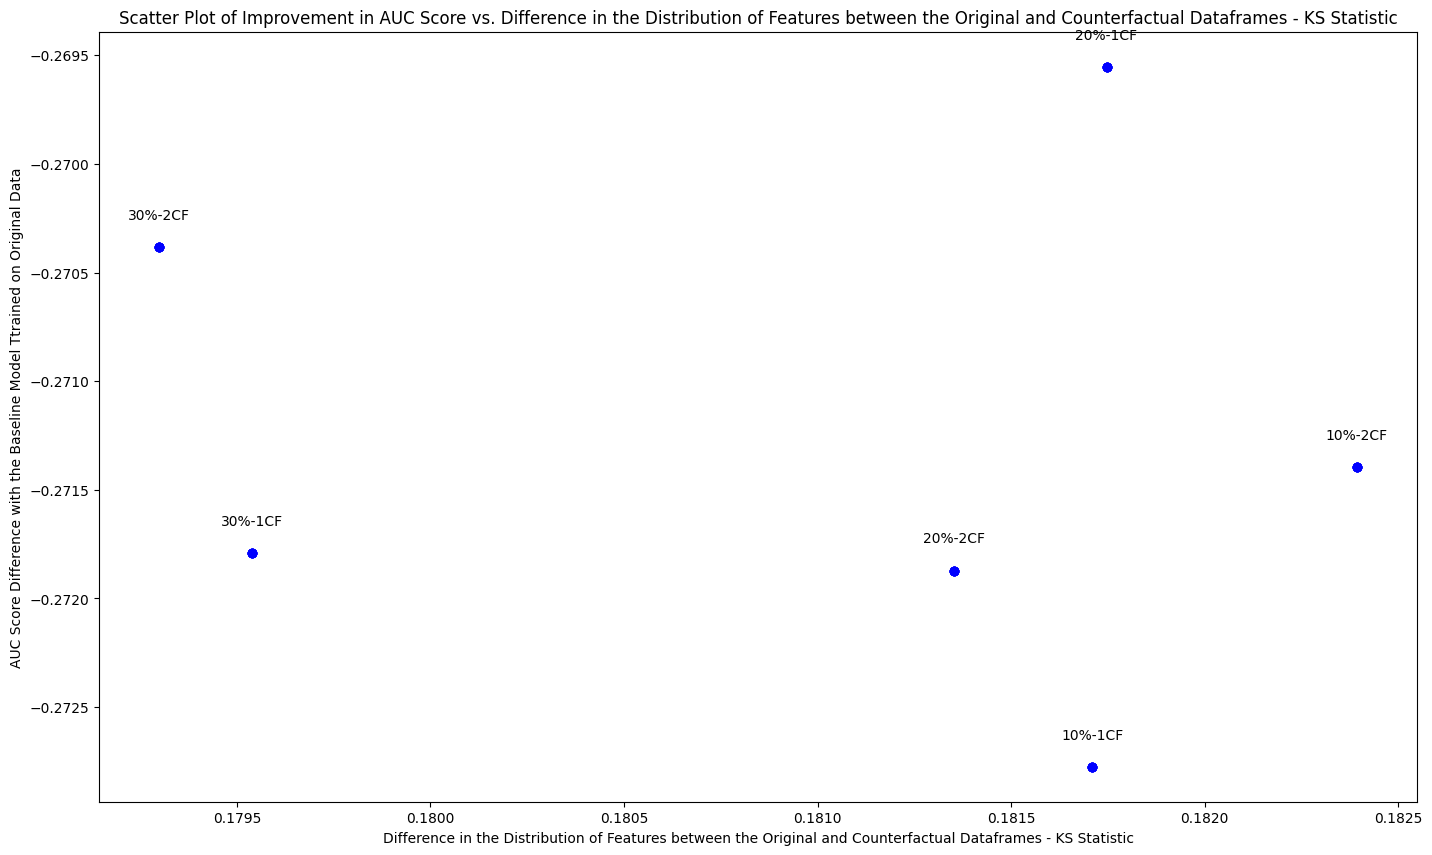

In [ ]:

# Show the plot
plt.figure(figsize=(17, 10))
# Plotting
for i, label in enumerate(labels):

    plt.scatter(ks_results_list, auc_diff_cf_2, color='blue')  # You can customize the color and marker.
    plt.annotate(label, (ks_results_list[i], auc_diff_cf_2[i]),
                 textcoords="offset points", xytext=(0,20), ha='center')
plt.title('Scatter Plot of Improvement in AUC Score vs. Difference in the Distribution of Features between the Original and Counterfactual Dataframes - KS Statistic')
plt.xlabel('Difference in the Distribution of Features between the Original and Counterfactual Dataframes - KS Statistic')
plt.ylabel('AUC Score Difference with the Baseline Model Ttrained on Original Data')
plt.show()